### Importing Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

### Loading the Dataset

In [ ]:
df1=pd.read_csv('movies.csv')

### Summary of the dataset

In [ ]:
df1.head(10)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0
5,Mississippi Mermaid,24551,2624551,NaN,1600000.0,15-Jan-99,NaN,NaN,MGM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Following,44705,44705,NaN,6000.0,4-Apr-99,R,NaN,Zeitgeist,NaN,NaN,NaN,Christopher Nolan,NaN,7.7,15133.0
7,Foolish,6026908,6026908,NaN,1600000.0,9-Apr-99,R,NaN,Artisan,Original Screenplay,Comedy,Contemporary Fiction,NaN,NaN,3.8,353.0
8,Pirates,1641825,6341825,NaN,40000000.0,1-Jul-86,R,NaN,NaN,NaN,NaN,NaN,Roman Polanski,25.0,5.8,3275.0
9,Duel in the Sun,20400000,20400000,NaN,6000000.0,31-Dec-46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,7.0,2906.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3201 non-null   object 
 1   US Gross                3201 non-null   object 
 2   Worldwide Gross         3201 non-null   object 
 3   US DVD Sales            564 non-null    float64
 4   Production Budget       3200 non-null   float64
 5   Release Date            3201 non-null   object 
 6   MPAA Rating             2596 non-null   object 
 7   Running Time (min)      1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major Genre             2926 non-null   object 
 11  Creative Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten Tomatoes Rating  2321 non-null   float64
 14  IMDB Rating             2988 non-null   

In [ ]:
df1.describe()

,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
count,5.640000e+02,3.200000e+03,1209.000000,2321.000000,2988.000000,2988.000000
mean,3.490155e+07,3.106917e+07,110.193548,54.336924,6.283467,29908.644578
std,4.589512e+07,3.558591e+07,20.171014,28.076593,1.252290,44937.582335
min,6.184540e+05,2.180000e+02,46.000000,1.000000,1.400000,18.000000
25%,9.906211e+06,6.575000e+06,95.000000,30.000000,5.600000,4828.500000
50%,2.033156e+07,2.000000e+07,107.000000,55.000000,6.400000,15106.000000
75%,3.779422e+07,4.200000e+07,121.000000,80.000000,7.200000,35810.500000
max,3.525821e+08,3.000000e+08,222.000000,100.000000,9.200000,519541.000000


In [ ]:
# Number of records in the table
len(df1)

3201

### List of Features & Their Unique Values

In [ ]:
df1.nunique()

Title                     3177
US Gross                  3061
Worldwide Gross           3075
US DVD Sales               564
Production Budget          381
Release Date              1604
MPAA Rating                  7
Running Time (min)         109
Distributor                174
Source                      18
Major Genre                 12
Creative Type                9
Director                   550
Rotten Tomatoes Rating     100
IMDB Rating                 77
IMDB Votes                2839
dtype: int64

### Columns with Continuous Values

In [ ]:
# List of columns which have float data type
d=df1.dtypes
print(*df1.dtypes[d.values=='float'].index, sep="\n")

US DVD Sales
Production Budget
Running Time (min)
Rotten Tomatoes Rating
IMDB Rating
IMDB Votes


as we can see from the table 'US Gross' and 'WorldWide Gross' Features must have a type of float as they are continue values.
Therefore we'll convert these fetures to float

In [ ]:
df1[df1[['US Gross','Worldwide Gross' ]]=='Unknown']=np.nan
#df.iloc[118:120,:]
df1[['US Gross','Worldwide Gross']] =df1[['US Gross','Worldwide Gross' ]].apply(pd.to_numeric)
#df1 = df1.infer_objects()
df1.dtypes

Title                      object
US Gross                  float64
Worldwide Gross           float64
US DVD Sales              float64
Production Budget         float64
Release Date               object
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
Rotten Tomatoes Rating    float64
IMDB Rating               float64
IMDB Votes                float64
dtype: object

In [ ]:
# Now Checking Number of NULL values
df=df1.select_dtypes(include='float')
df.isnull().sum()

US Gross                     7
Worldwide Gross              7
US DVD Sales              2637
Production Budget            1
Running Time (min)        1992
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64

In [ ]:
#box plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


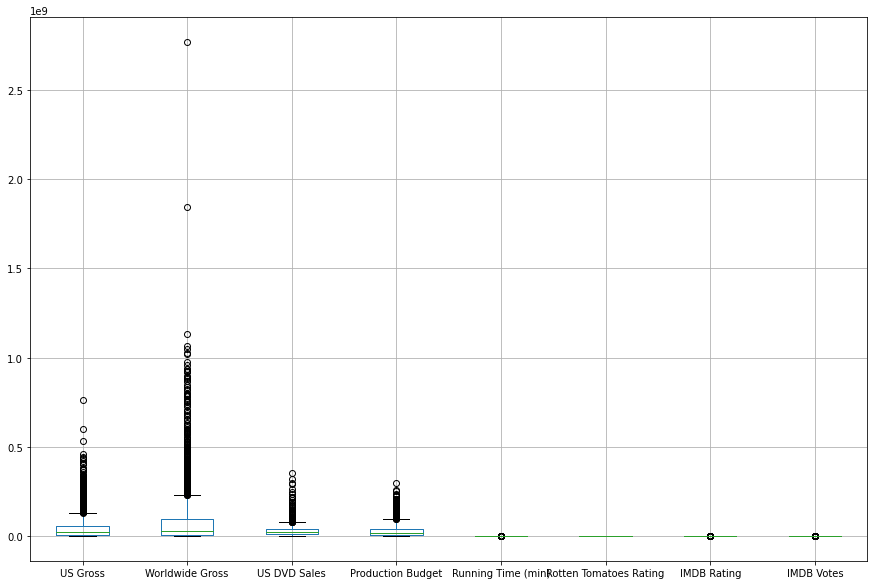

In [ ]:
# the box plot check ranges, many outliers are present in first 4 features
plt.figure(figsize=(15, 10))
# scaled_df[['US Gross', 'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'IMDB Votes']].boxplot()
df1.boxplot()
# plt.xticks([1, 2, 3, 4], ['US Gross', 'Worldwide Gross', 'US DVD Sales', 'P. Budget', 'Run. Time', 'R. Tomatoes', 'IMDB Rating', 'IMDB Votes'])
# plt.xticks([1, 2, 3, 4, 5], ['US Gross', 'Worldwide Gross', 'US DVD Sales', 'P. Budget', 'IMDB Votes'])
plt.show()



### fill NA with mean values

In [ ]:
#Fill na with mean in numeric data
for i in df1.columns:
  if df1[i].dtypes=='float':
    df1[i]=df1[i].fillna(df1[i].mean())

In [ ]:
# Recheck if any missing values still persists
df1.select_dtypes(include='float').isnull().sum()


US Gross                  0
Worldwide Gross           0
US DVD Sales              0
Production Budget         0
Running Time (min)        0
Rotten Tomatoes Rating    0
IMDB Rating               0
IMDB Votes                0
dtype: int64

Testing

In [ ]:
df1.nunique()

Title                     3177
US Gross                  3061
Worldwide Gross           3075
US DVD Sales               565
Production Budget          382
Release Date              1604
MPAA Rating                  7
Running Time (min)         110
Distributor                174
Source                      18
Major Genre                 12
Creative Type                9
Director                   550
Rotten Tomatoes Rating     101
IMDB Rating                 78
IMDB Votes                2840
dtype: int64

In [ ]:
df1.isnull().sum()

Title                        0
US Gross                     7
Worldwide Gross              7
US DVD Sales              2637
Production Budget            1
Release Date                 0
MPAA Rating                605
Running Time (min)        1992
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64

In [ ]:
"""As we can see the histogram is skewed, therefore some of the features do not follow bell curve. In order to perform eda 
further we have to perform Scaling"""

In [ ]:
sub_df = df1.select_dtypes(include='float')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
scaled_df = ss.fit_transform(sub_df)
scaled_df = pd.DataFrame(scaled_df, columns=sub_df.columns)
scaled_df = pd.concat([scaled_df, df1['Major Genre']], axis=1)
scaled_df.head()

,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Major Genre
0,0.000192,0.000053,NaN,0.026666,NaN,NaN,0.602564,0.002027,NaN
1,0.000014,0.000004,NaN,0.000999,NaN,NaN,0.705128,0.000364,Drama
2,0.000267,0.000073,NaN,0.000833,NaN,NaN,0.692308,0.001630,Comedy
3,0.000491,0.000135,NaN,0.000999,NaN,0.121212,NaN,NaN,Comedy
4,0.001328,0.000393,NaN,0.003333,NaN,0.616162,0.256410,0.000283,Drama


### Task 1 - Correlation Analysis

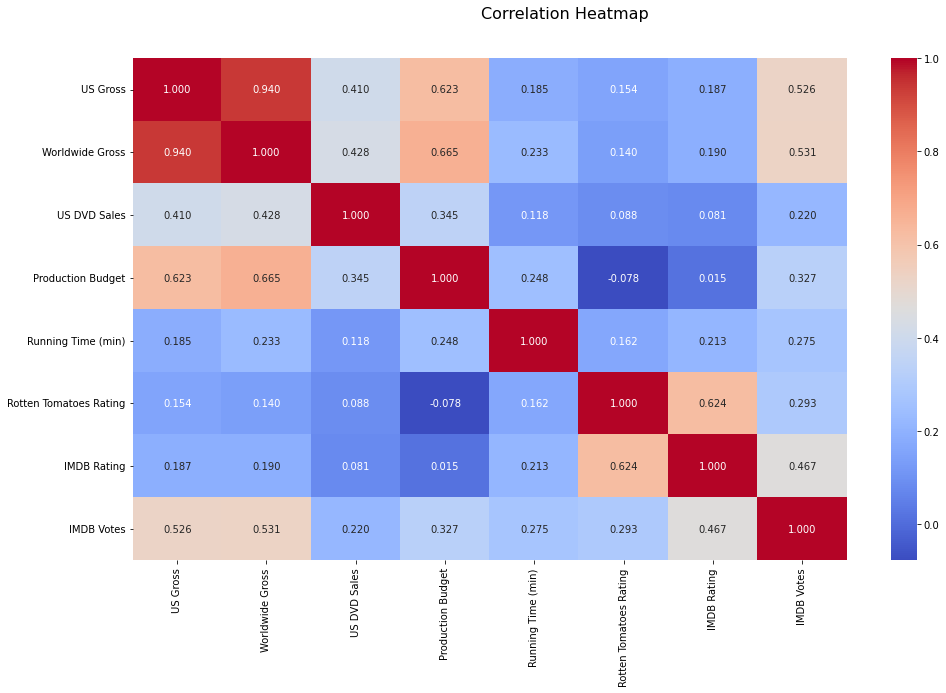

In [ ]:
#Step 1. 
"""Is there a relationship between columns? Are the columns IMDB rating and Production budget correlated? Is there any relationship between the movie
 budget and revenue?"""
 
 #corrolation heatmap
fig, ax = plt.subplots(figsize=(16, 9))
corr = df1.corr()
htmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.3f')
fig.subplots_adjust(top=0.90)
c= fig.suptitle('Correlation Heatmap', fontsize=16)



### Task 3 - Performing EDA

In [ ]:
df1.select_dtypes(include='float')

,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,146083.0,146083.0,3.490155e+07,8000000.0,110.193548,54.336924,6.100000,1071.000000
1,10876.0,10876.0,3.490155e+07,300000.0,110.193548,54.336924,6.900000,207.000000
2,203134.0,203134.0,3.490155e+07,250000.0,110.193548,54.336924,6.800000,865.000000
3,373615.0,373615.0,3.490155e+07,300000.0,110.193548,13.000000,6.283467,29908.644578
4,1009819.0,1087521.0,3.490155e+07,1000000.0,110.193548,62.000000,3.400000,165.000000
...,...,...,...,...,...,...,...,...
3196,31452765.0,36851125.0,2.124032e+07,24000000.0,101.000000,65.000000,7.000000,55687.000000
3197,33080084.0,83080084.0,2.098303e+07,85000000.0,157.000000,89.000000,6.283467,29908.644578
3198,11989328.0,12506188.0,6.679409e+06,35000000.0,110.193548,3.000000,3.400000,7424.000000
3199,45575336.0,141475336.0,3.490155e+07,80000000.0,129.000000,26.000000,5.700000,21161.000000


#### 2d Scatter Plots

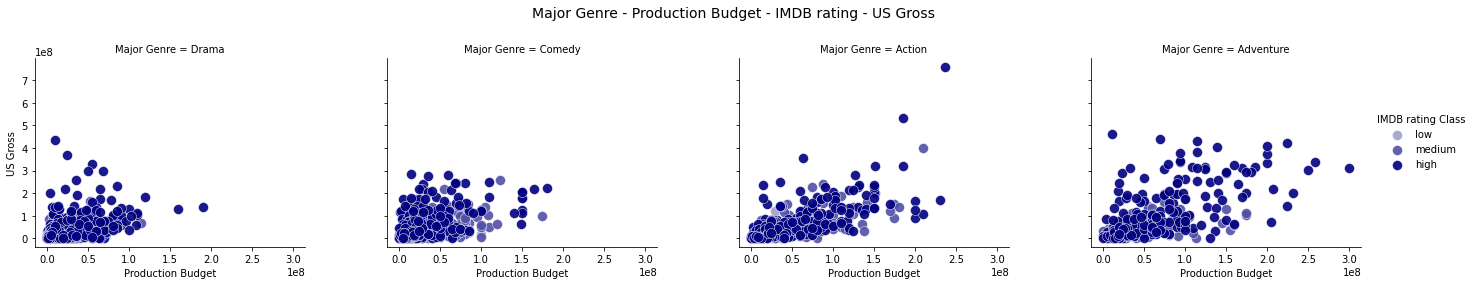

In [ ]:
df1['IMDB-lable'] = df1['IMDB Rating'].apply(lambda value: 'low' 
                                                          if value <= 3 else 'medium' 
                                                              if value <= 6 else 'high')
df1['IMDB-lable'] = pd.Categorical(df1['IMDB-lable'], 
                                           categories=['low', 'medium', 'high'])

df2=df1[(df1['Major Genre']=='Drama') | (df1['Major Genre']=='Comedy')|(df1['Major Genre']=='Action') |(df1['Major Genre']=='Adventure')]

g = sns.FacetGrid(df2, col='Major Genre', hue='IMDB-lable', 
                  col_order=['Drama', 'Comedy','Action','Adventure'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, height=4, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "Production Budget", "US Gross", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Major Genre - Production Budget - IMDB rating - US Gross', fontsize=14)
l = g.add_legend(title='IMDB rating Class')


In [ ]:
round(df1['IMDB Rating']).value_counts()

6.0    1156
7.0     853
8.0     481
5.0     419
4.0     163
3.0      67
9.0      35
2.0      26
1.0       1
Name: IMDB Rating, dtype: int64

#### Checking Distribution of the dataset

#### Parallel Coordinates

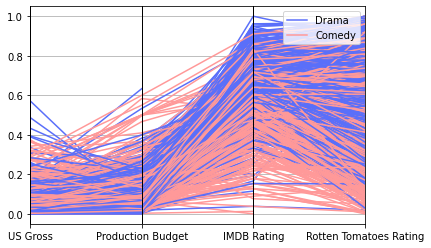

In [ ]:
scaled_df=scaled_df[(scaled_df['Major Genre']=='Drama') | (scaled_df['Major Genre']=='Comedy') ]
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(scaled_df[['US Gross','Production Budget', 'IMDB Rating','Rotten Tomatoes Rating','Major Genre']], 'Major Genre', color=('#5A6FFA', '#FF9999','#E60DA1'))


#### Bar Chart

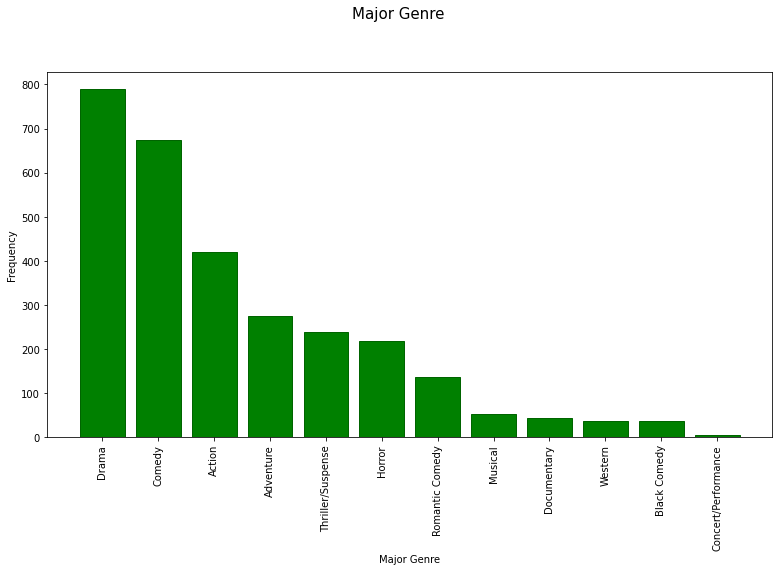

In [ ]:

fig = plt.figure(figsize = (13, 7))
title = fig.suptitle("Major Genre", fontsize=15)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Major Genre")
ax.set_ylabel("Frequency") 
w_q = df1['Major Genre'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=10)
bar = ax.bar(w_q[0], w_q[1], color='green', edgecolor='darkgreen', linewidth=1)

#### Relation of US Gross Revenue,Production Budget and Ratings in terms of differnt Genres (Using 3d Scatter Plots)

Text(0.5, 0, 'Rotten Tomatoes Rating')

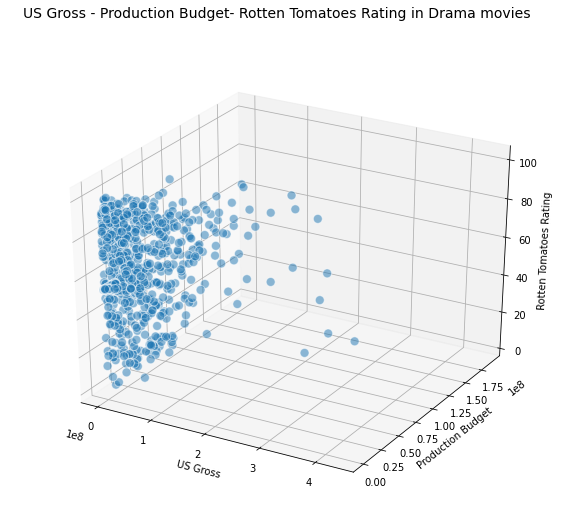

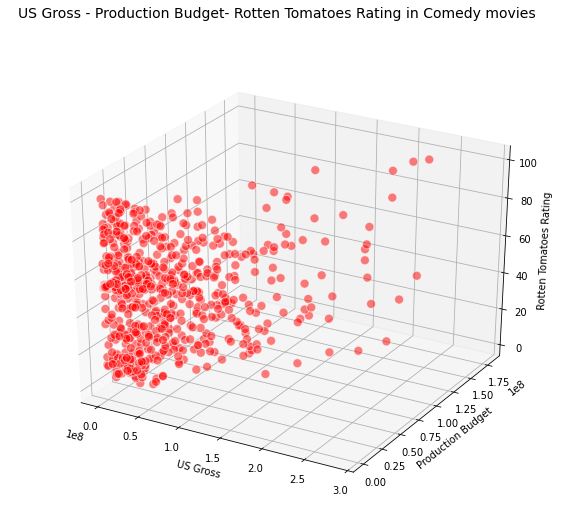

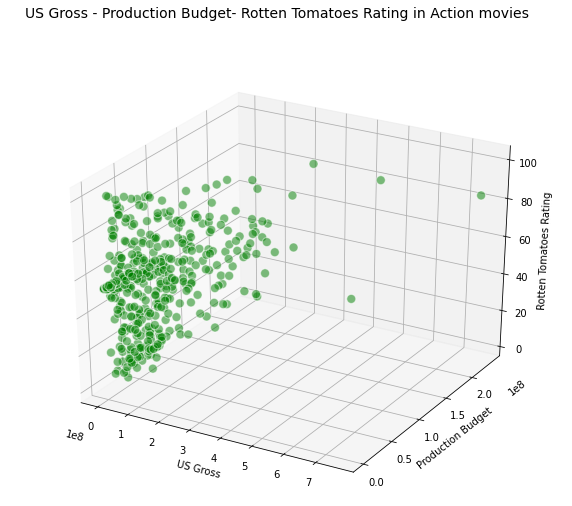

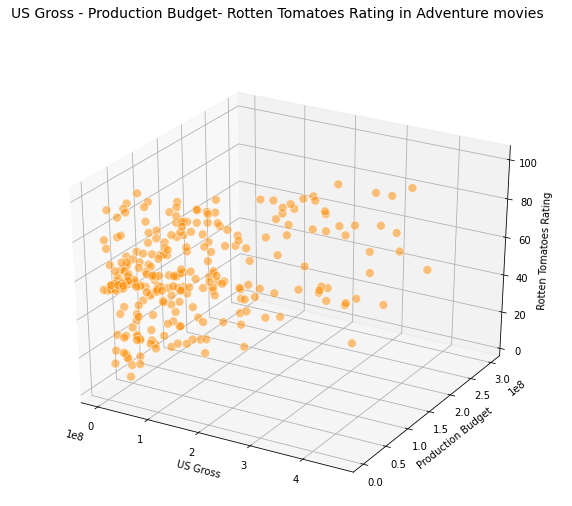

In [ ]:
# according the above chart: Drama, Comedy and Action and adventure have most frequencies.

# Evaluating these four Genre separately (Drama, Comedy, Action and adventure) 
# Drama movie
df3=df1[(df1['Major Genre']=="Drama")]
fig = plt.figure(figsize=(10, 8))
ax= fig.add_subplot(111, projection='3d')
t = fig.suptitle('US Gross - Production Budget- Rotten Tomatoes Rating in Drama movies', fontsize=14)

xs = list(df3['US Gross'])
ys = list(df3['Production Budget'])
zs = list(df3['Rotten Tomatoes Rating'])
#data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

#ss = list(df3['US DVD Sales'])

#for data, size in zip(data_points,  ss):
    #x, y, z = data
ax.scatter(xs, ys, zs, s=80, alpha=0.5, edgecolors="w" )


ax.set_xlabel('US Gross')
ax.set_ylabel('Production Budget')
ax.set_zlabel('Rotten Tomatoes Rating')

# Comedy movie
df3=df1[(df1['Major Genre']=="Comedy")]
fig = plt.figure(figsize=(10, 8))
ax1= fig.add_subplot(111, projection='3d')
t = fig.suptitle('US Gross - Production Budget- Rotten Tomatoes Rating in Comedy movies', fontsize=14)

xs = list(df3['US Gross'])
ys = list(df3['Production Budget'])
zs = list(df3['Rotten Tomatoes Rating'])
#data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

#ss = list(df3['US DVD Sales'])

#for data, size in zip(data_points,  ss):
    #x, y, z = data
ax1.scatter(xs, ys, zs, s=80, alpha=0.5,c='red', edgecolors="w" )


ax1.set_xlabel('US Gross')
ax1.set_ylabel('Production Budget')
ax1.set_zlabel('Rotten Tomatoes Rating')

# Action movie
df3=df1[(df1['Major Genre']=="Action")]
fig = plt.figure(figsize=(10, 8))
ax2= fig.add_subplot(111, projection='3d')
t = fig.suptitle('US Gross - Production Budget- Rotten Tomatoes Rating in Action movies', fontsize=14)

xs = list(df3['US Gross'])
ys = list(df3['Production Budget'])
zs = list(df3['Rotten Tomatoes Rating'])
#data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

#ss = list(df3['US DVD Sales'])

#for data, size in zip(data_points,  ss):
    #x, y, z = data
ax2.scatter(xs, ys, zs, s=80, alpha=0.5,c='green', edgecolors="w" )


ax2.set_xlabel('US Gross')
ax2.set_ylabel('Production Budget')
ax2.set_zlabel('Rotten Tomatoes Rating')

# Adventure movie
df3=df1[(df1['Major Genre']=="Adventure")]
fig = plt.figure(figsize=(10, 8))
ax3= fig.add_subplot(111, projection='3d')
t = fig.suptitle('US Gross - Production Budget- Rotten Tomatoes Rating in Adventure movies', fontsize=14)

xs = list(df3['US Gross'])
ys = list(df3['Production Budget'])
zs = list(df3['Rotten Tomatoes Rating'])
#data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

#ss = list(df3['US DVD Sales'])

#for data, size in zip(data_points,  ss):
    #x, y, z = data
ax3.scatter(xs, ys, zs, s=80, alpha=0.5,c='darkorange', edgecolors="w" )


ax3.set_xlabel('US Gross')
ax3.set_ylabel('Production Budget')
ax3.set_zlabel('Rotten Tomatoes Rating')





In [ ]:
# Relation of US Gross Revenue,Production Budget and Ratings in terms of all Genre movies in one chart (Using 3d Scatter Plots)

Text(0.5, 0, 'Rotten Tomatoes Rating')

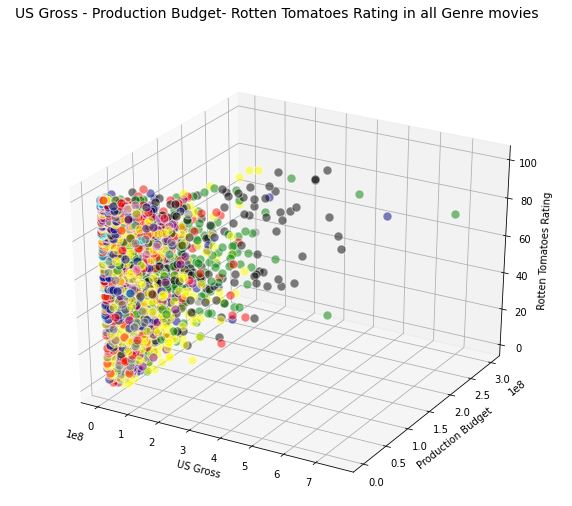

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax3= fig.add_subplot(111, projection='3d')
t = fig.suptitle('US Gross - Production Budget- Rotten Tomatoes Rating in all Genre movies', fontsize=14)

xs = list(df1['US Gross'])
ys = list(df1['Production Budget'])
zs = list(df1['Rotten Tomatoes Rating'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]


colors = ['red' if i=='Drama' else 'yellow' if i =='Comedy' else 'green' 
          if i == 'Action' else 'black' if i=='Adventure' else 'pink' if 
          i=='Triller/Suspene' else 'grey' if i=='Horror'  else 'purple' 
          if i=='Romantic Comedy' else 'orchid' if i=='Musical' else 'cyan'
           if i=='Documentary' else 'teal' if i=='Western' else 'orange' if 
          i=='Black Comedy' else 'navy' for i in list(df1['Major Genre'])]
#"Good" if i >= 4 else "Neutral" if i == 3 else "Bad"
for data, color in zip(data_points, colors ):
    x, y, z = data
    ax3.scatter(x, y, z, c=color, alpha=0.5,s=80 ,edgecolors="w" )


ax3.set_xlabel('US Gross')
ax3.set_ylabel('Production Budget')
ax3.set_zlabel('Rotten Tomatoes Rating')

